In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
files = ['balanced_data/BK7610_balanced_250hz.parquet', 
         'balanced_data/BU4707_balanced_250hz.parquet', 
         'balanced_data/CC6740_balanced_250hz.parquet',
         'balanced_data/DC6359_balanced_250hz.parquet',
         'balanced_data/DK3500_balanced_250hz.parquet',
         'balanced_data/HV0618_balanced_250hz.parquet',
         'balanced_data/JB3156_balanced_250hz.parquet',
         'balanced_data/JR8022_balanced_250hz.parquet',
         'balanced_data/MC7070_balanced_250hz.parquet',
         'balanced_data/MJ8002_balanced_250hz.parquet',
         'balanced_data/PC6771_balanced_250hz.parquet',
         'balanced_data/SA0297_balanced_250hz.parquet',
         'balanced_data/SF3079_balanced_250hz.parquet'
         ]

In [3]:
feat_files = ['features/BK7610_features.parquet', 
         'features/BU4707_features.parquet', 
         'features/CC6740_features.parquet',
         'features/DC6359_features.parquet',
         'features/DK3500_features.parquet',
         'features/HV0618_features.parquet',
         'features/JB3156_features.parquet',
         'features/JR8022_features.parquet',
         'features/MC7070_features.parquet',
         'features/MJ8002_features.parquet',
         'features/PC6771_features.parquet',
         'features/SA0297_features.parquet',
         'features/SF3079_features.parquet'
         ]

In [4]:
pids = ['BK7610', 
         'BU4707', 
         'CC6740',
         'DC6359',
         'DK3500',
         'HV0618',
         'JB3156',
         'JR8022',
         'MC7070',
         'MJ8002',
         'PC6771',
         'SA0297',
         'SF3079'
         ]

In [5]:
def thirteen_fold_cross_validation(parquet_files):
    accuracies = []
    confusion_matrices_raw = []
    confusion_matrices_norm = []
    test_pids = []
    models = []
    
    for i, test_file in enumerate(parquet_files):
        test_data = pd.read_parquet(test_file)
        test_labels = test_data['TAC_class']
        test_id = pids[i]
        test_data = test_data.drop(columns=['time', 'pid','TAC_class'])
        
        train_files = parquet_files[:i] + parquet_files[i+1:]
        train_data = pd.concat([pd.read_parquet(file) for file in train_files])
        train_labels = train_data['TAC_class']
        train_data = train_data.drop(columns=['time', 'pid','TAC_class'])
            
        rf_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(train_data, train_labels)
        y_pred = rf_classifier.predict(test_data)
        accuracy = rf_classifier.score(test_data, test_labels)
        accuracies.append(accuracy)
        print(f"Test on participant {test_id}, Fold {len(accuracies)}: {round(accuracy, 4) * 100}% accuracy")
        conf_matrix = confusion_matrix(test_labels, y_pred)
        conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
        confusion_matrices_raw.append(conf_matrix)
        confusion_matrices_norm.append(conf_matrix_norm)

        test_pids.append(test_id)
        models.append(rf_classifier)

        # Plot confusion matrix with percentages
        data = pd.read_parquet(test_file)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix {pids[i]} (Percentages)")
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        plt.show()
    
    return test_pids, accuracies, confusion_matrices_raw, confusion_matrices_norm, models

Test on participant BK7610, Fold 1: 71.00999999999999% accuracy


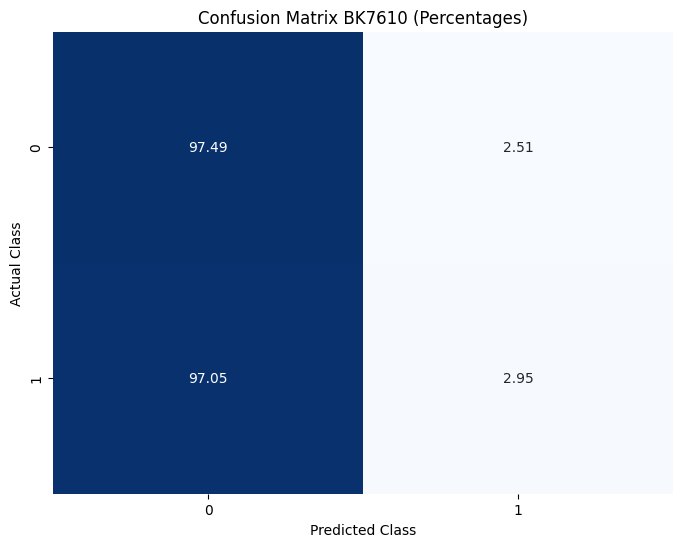

Test on participant BU4707, Fold 2: 87.21% accuracy


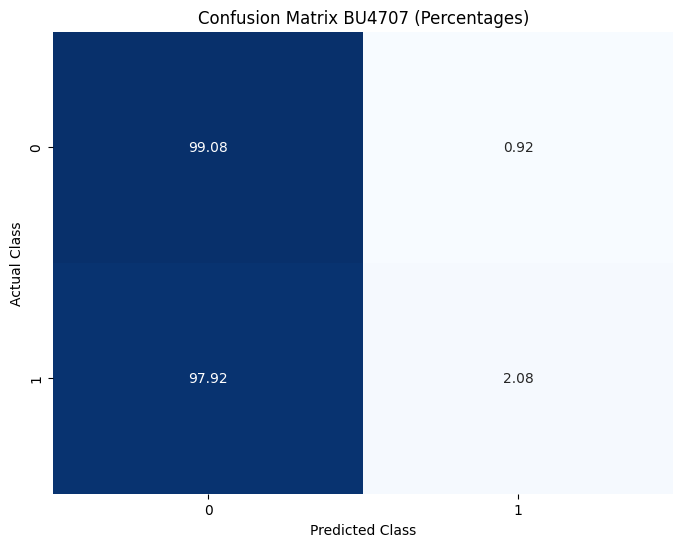

Test on participant CC6740, Fold 3: 67.32000000000001% accuracy


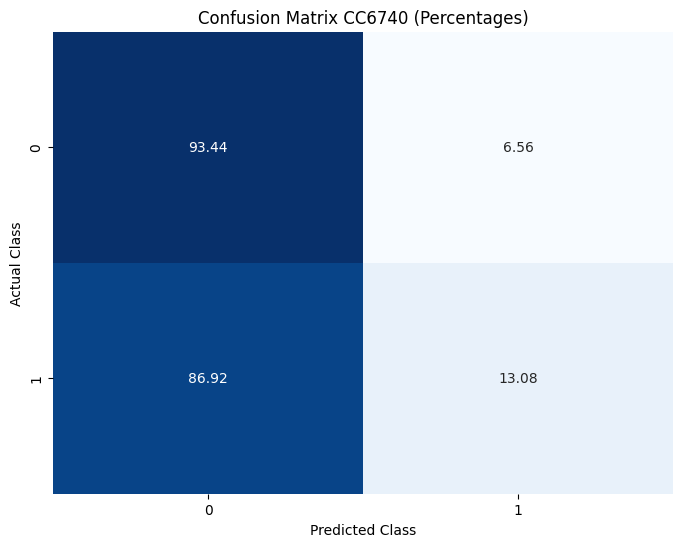

Test on participant DC6359, Fold 4: 60.709999999999994% accuracy


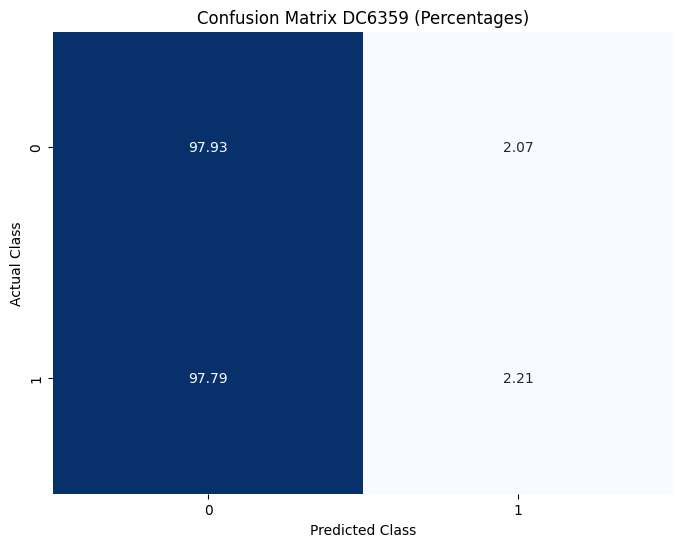

Test on participant DK3500, Fold 5: 15.740000000000002% accuracy


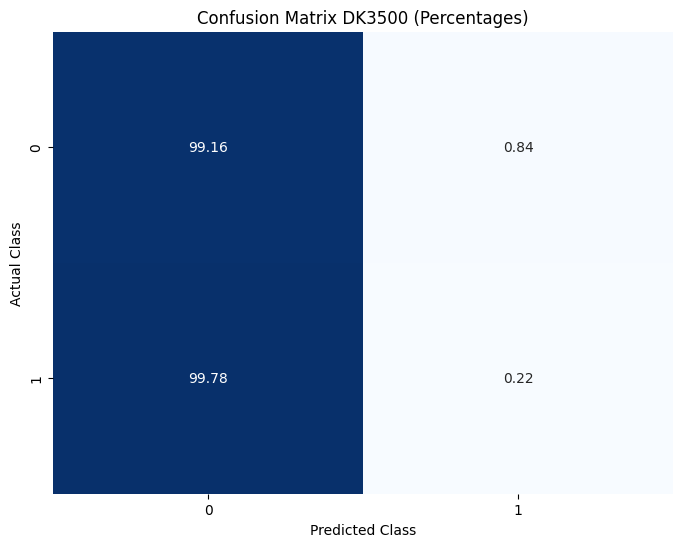

Test on participant HV0618, Fold 6: 82.22% accuracy


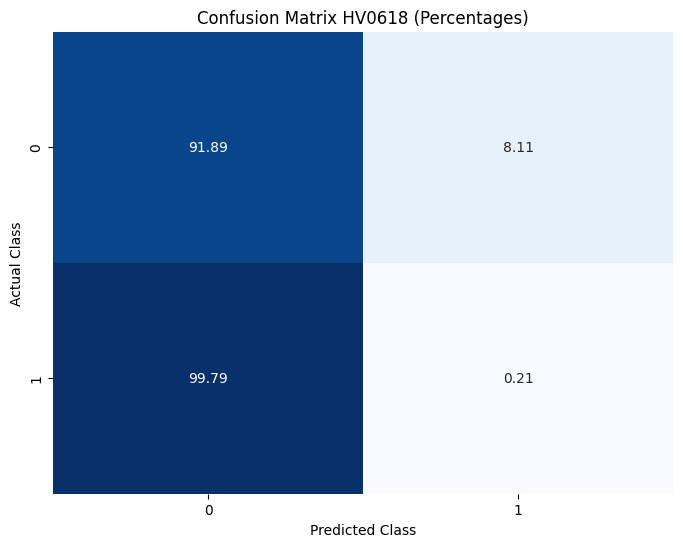

Test on participant JB3156, Fold 7: 54.02% accuracy


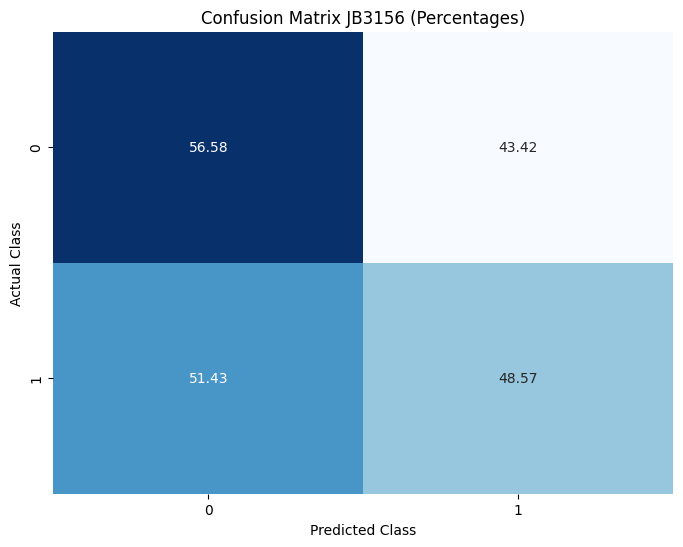

Test on participant JR8022, Fold 8: 68.78999999999999% accuracy


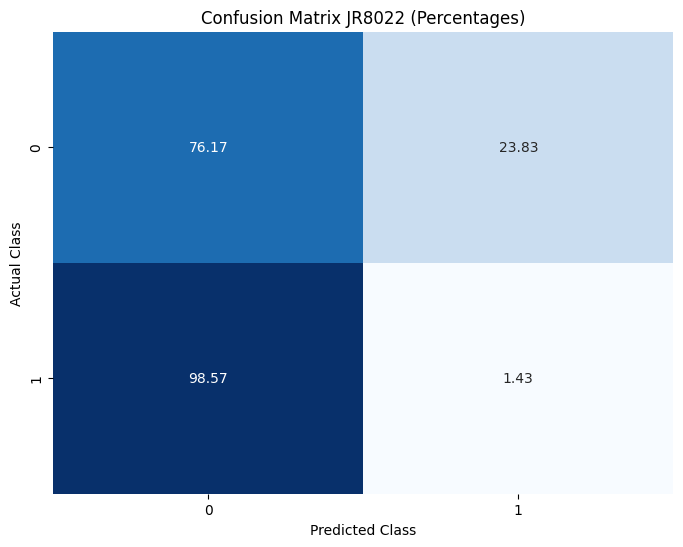

Test on participant MC7070, Fold 9: 73.50999999999999% accuracy


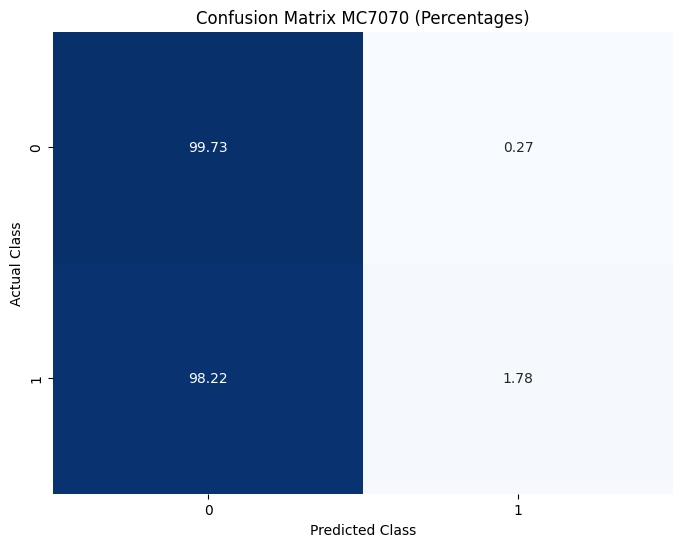

Test on participant MJ8002, Fold 10: 55.2% accuracy


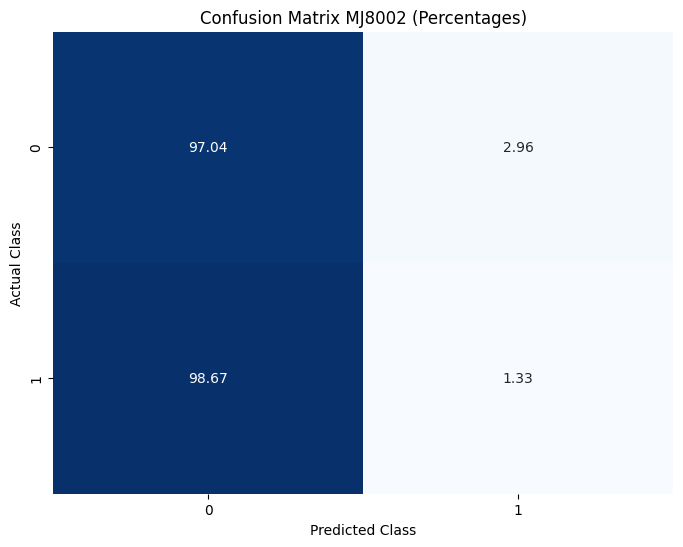

Test on participant PC6771, Fold 11: 72.68% accuracy


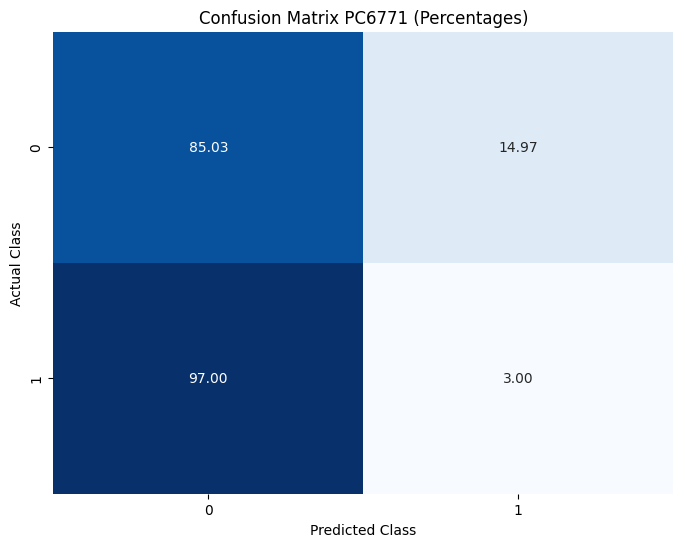

Test on participant SA0297, Fold 12: 88.52% accuracy


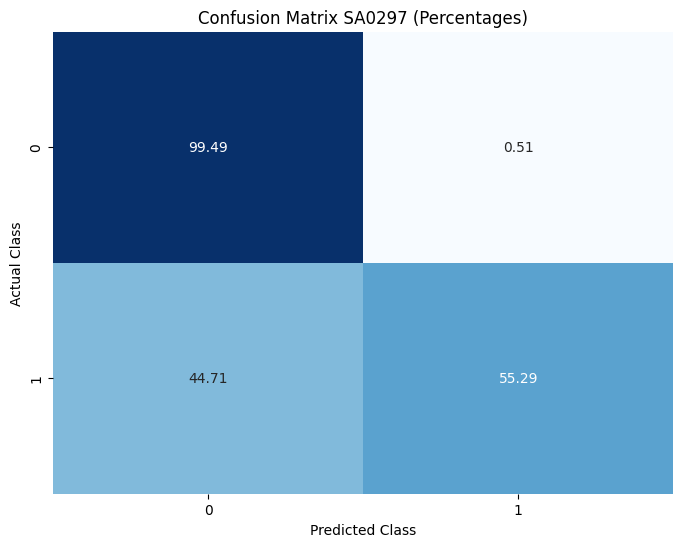

Test on participant SF3079, Fold 13: 83.39% accuracy


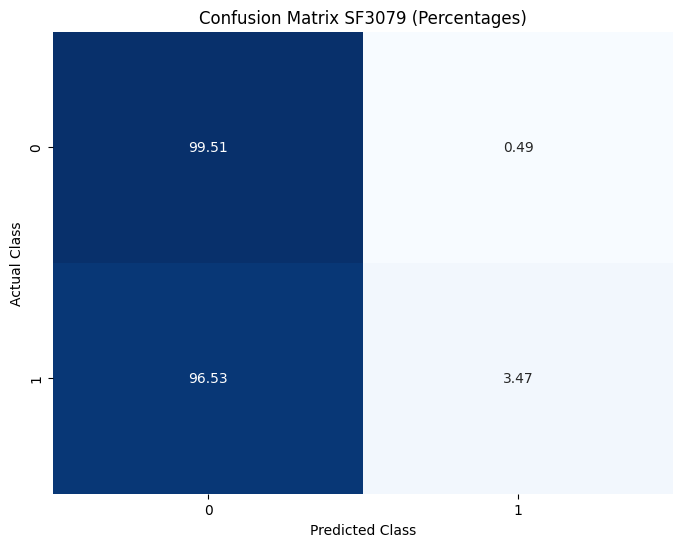

In [7]:
test_pids, accuracies, confusion_matrices_raw, confusion_matrices_norm, models  = thirteen_fold_cross_validation(feat_files)

## Feature Analysis Gradient Boosting

In [ ]:
cm_data = []
for idx, pid in enumerate(test_pids):
    cm_norm = confusion_matrices_norm[idx]
    cm = confusion_matrices_raw[idx]
    cm_data.append((pid, cm_norm[0][0], cm_norm[0][1], cm_norm[1][1], cm_norm[1][0], cm[0][0], cm[0][1], cm[1][1], cm[1][0]))


cm_data

[('BK7610',
  97.4921630094044,
  2.507836990595611,
  2.954341987466428,
  97.04565801253358,
  5598,
  144,
  66,
  2168),
 ('BU4707',
  99.08482142857142,
  0.9151785714285715,
  2.08,
  97.92,
  4439,
  41,
  13,
  612),
 ('CC6740',
  93.4375,
  6.5625,
  13.075734157650695,
  86.9242658423493,
  6279,
  441,
  423,
  2812),
 ('DC6359',
  97.93089594214544,
  2.06910405785456,
  2.2102936532996527,
  97.78970634670034,
  4875,
  103,
  70,
  3097),
 ('DK3500',
  99.15865384615384,
  0.8413461538461539,
  0.22361359570661896,
  99.77638640429338,
  825,
  7,
  10,
  4462),
 ('HV0618',
  91.89325913747312,
  8.106740862526875,
  0.21436227224008575,
  99.78563772775992,
  7266,
  641,
  2,
  931),
 ('JB3156',
  56.58085044836564,
  43.41914955163437,
  48.570550261297264,
  51.429449738702736,
  3912,
  3002,
  1580,
  1673),
 ('JR8022',
  76.17126496616345,
  23.828735033836544,
  1.4251781472684086,
  98.57482185273159,
  5853,
  1831,
  12,
  830),
 ('MC7070',
  99.72530902734424,

In [ ]:
feature_names = ['x_mean', 'y_mean', 'z_mean', 'mag_mean', 'x_std', 'y_std', 'z_std', 'mag_std', 
                'x_median', 'y_median', 'z_median', 'mag_median', 'x_crossing', 'y_crossing', 'z_crossing', 
                'x_max', 'y_max', 'z_max', 'mag_max', 'time_entropy', 'frequency_entropy', 'spectral_centroid']

In [ ]:
feature_importances = {}

# for i in range(len(test_pids)):
#     feature_importances[test_pids[i]] = models[i].feature_importances_

feature_importances = {pid: model.feature_importances_ for pid, model in zip(test_pids, models)}

# Populate missing feature importances with zeros
for pid in feature_importances:
    if len(feature_importances[pid]) != len(feature_names):
        print (len(feature_names) - len(feature_importances[pid]))

In [ ]:
feature_importances

{'BK7610': array([4.06978708e-02, 3.06439327e-02, 5.77724039e-02, 8.05066207e-03,
        3.86574806e-03, 4.40152632e-04, 2.92007143e-02, 1.99177300e-04,
        2.54995169e-02, 1.44491846e-02, 1.09861801e-02, 1.76435431e-02,
        9.81324690e-04, 8.74563348e-03, 8.70488691e-03, 2.01399529e-01,
        3.84642830e-02, 4.20503653e-01, 1.20862050e-02, 6.72456584e-02,
        2.13454949e-03, 2.85191106e-04]),
 'BU4707': array([3.44570213e-02, 3.28222237e-02, 5.36525340e-02, 1.13171830e-02,
        1.24552764e-02, 3.86388567e-03, 3.11275817e-02, 1.61561858e-03,
        2.92925779e-02, 2.06075863e-02, 1.42180310e-02, 1.09322368e-02,
        2.30721284e-03, 2.76941417e-03, 6.49205756e-03, 1.41075354e-01,
        9.83960622e-02, 4.20987557e-01, 1.80046533e-02, 3.51940853e-02,
        1.82610362e-02, 1.50810766e-04]),
 'CC6740': array([6.95796239e-02, 3.31426491e-02, 4.67870261e-02, 7.90919800e-03,
        3.40405452e-02, 5.68002418e-03, 1.63996899e-02, 1.25025103e-04,
        4.12880920e-02

In [ ]:
feature_importance_df = pd.DataFrame(feature_importances, index=feature_names)

feature_importance_df

,BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079
x_mean,0.040698,0.034457,0.069580,0.217284,0.038800,0.048407,0.058470,0.051464,0.045210,0.028438,0.112962,0.042604,0.045813
y_mean,0.030644,0.032822,0.033143,0.022356,0.056180,0.049824,0.096275,0.030506,0.044378,0.051102,0.018193,0.036101,0.045147
z_mean,0.057772,0.053653,0.046787,0.023304,0.038841,0.019499,0.059387,0.015248,0.059960,0.016981,0.102931,0.124299,0.050553
mag_mean,0.008051,0.011317,0.007909,0.003894,0.013983,0.032333,0.009843,0.016100,0.010519,0.007266,0.008740,0.030399,0.007878
x_std,0.003866,0.012455,0.034041,0.000411,0.008010,0.008445,0.018034,0.003985,0.087605,0.025092,0.005193,0.005727,0.012242
y_std,0.000440,0.003864,0.005680,0.004535,0.000347,0.000796,0.000861,0.012100,0.001005,0.017766,0.009542,0.000352,0.006507
z_std,0.029201,0.031128,0.016400,0.015420,0.019942,0.030503,0.045537,0.018510,0.015240,0.040394,0.029397,0.039303,0.026219
mag_std,0.000199,0.001616,0.000125,0.000064,0.000404,0.000752,0.000255,0.000592,0.000430,0.000587,0.001067,0.000376,0.004873
x_median,0.025500,0.029293,0.041288,0.047885,0.046605,0.034039,0.034878,0.027644,0.037320,0.026029,0.047666,0.035943,0.023467
y_median,0.014449,0.020608,0.093072,0.013471,0.101416,0.082220,0.025510,0.011225,0.023568,0.016379,0.015744,0.026975,0.018181


In [ ]:
feature_importance_df.to_parquet('gradient_feature_importance_no_spectral_flux.parquet')

In [ ]:
feature_importance_df = pd.read_parquet('gradient_feature_importance_no_spectral_flux.parquet')